## Introduction

This a notebook that uses a custom simple neural network. The objective is to test and fine tune it on the MNIST dataset. The neural network is implemented in the `neural_network.py` file. The notebook will use the `neural_network.py` file to train and test the neural network on the MNIST dataset.

### Install the required packages

In [70]:
#!pip install keras
#!pip install tensorflow
#!pip install scikit-learn

In [71]:
from CustomNeuralNetwork import CustomNeuralNetwork
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder



## Analizing the data

The MNIST dataset is a dataset of 28x28 grayscale images of handwritten digits. The dataset has 60,000 training images and 10,000 test images. The images are labeled with the corresponding digit. This is already a processed dataset, so we don't need to make much preprocessing.


In [72]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()


In [73]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Then we should plot the first 10 images from the training set and display the class name below each image. This will verify that the data is in the correct format and we're ready to build and train the network.

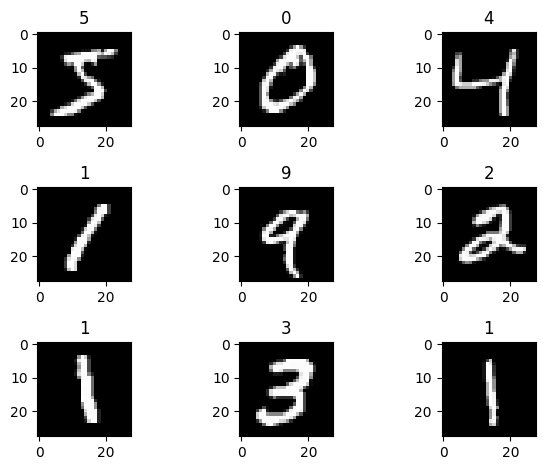

In [74]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.title(train_y[i])
plt.tight_layout()
plt.show()


Also, making sure of the even distribution of the classes in the dataset is important. We can do this by plotting the number of samples for each class.

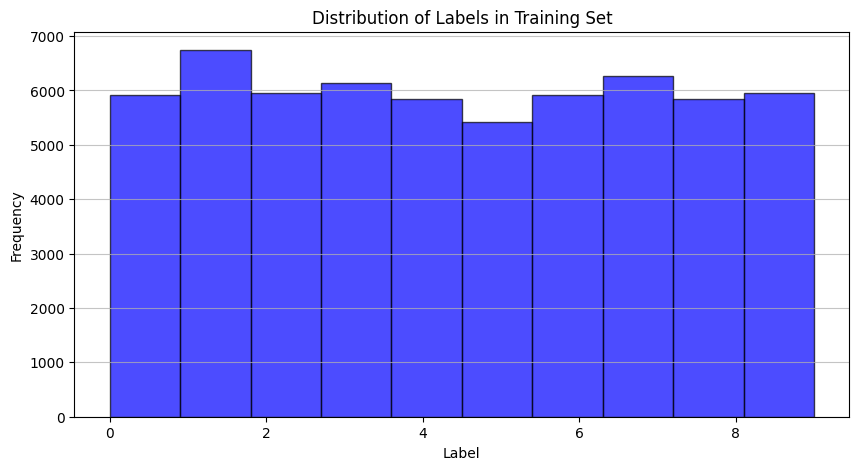

In [75]:
# Plot the distribution of labels in the training set
plt.figure(figsize=(10, 5))
plt.hist(train_y, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [76]:
print("Training set - Max value:", train_X_normalized.max(), "Min value:", train_X_normalized.min())
print("Test set - Max value:", test_X_normalized.max(), "Min value:", test_X_normalized.min())
print("Test set - Max value:", test_X_normalized.max(), "Min value:", test_X_normalized.min())
print("Test set - Max value:", test_X_normalized.max(), "Min value:", test_X_normalized.min())


Training set - Max value: 1.0 Min value: 0.0
Test set - Max value: 1.0 Min value: 0.0
Test set - Max value: 1.0 Min value: 0.0
Test set - Max value: 1.0 Min value: 0.0


## Processing the data

For the neural network to work, we need to flatten the images to a 1D array.

In [77]:
train_X_flatten = train_X.reshape(train_X.shape[0], -1).T
train_y = train_y.reshape(1, -1) 

train_y = train_y.reshape(1, -1)  # Esto es para el conjunto de entrenamiento
test_y = test_y.reshape(1, -1)

Then we will plot the distribution of values of the pixels. This will help us decide if we need to normalize the data.

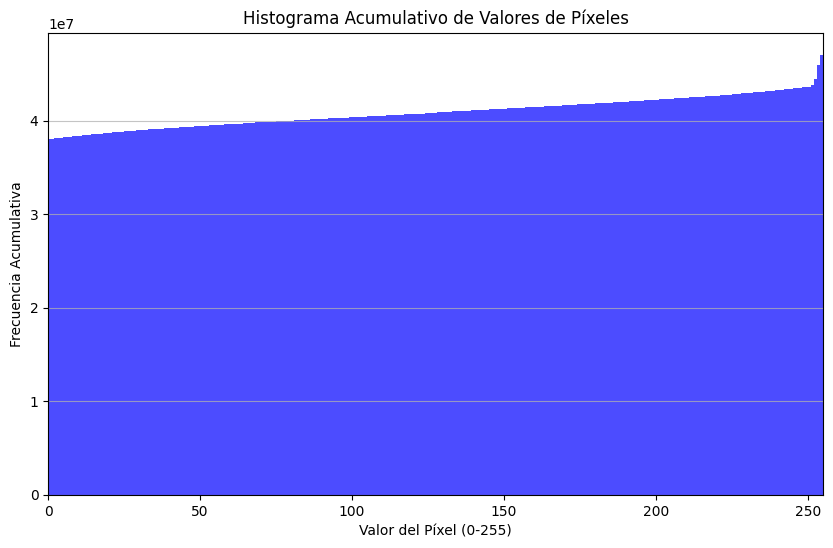

In [78]:
plt.figure(figsize=(10, 6))
plt.hist(train_X_flatten.flatten(), bins=255, range=(0, 255), color='blue', alpha=0.7, cumulative=True)
plt.title('Histograma Acumulativo de Valores de Píxeles')
plt.xlabel('Valor del Píxel (0-255)')
plt.ylabel('Frecuencia Acumulativa')
plt.grid(axis='y', alpha=0.75)
plt.xlim([0, 255])
plt.show()

In [79]:
print("Training set - Max value:", train_X.max(), "Min value:", train_X.min())
print("Training set labels - Max value:", train_y.max(), "Min value:", train_y.min())
print("Test set - Max value:", test_X.max(), "Min value:", test_X.min())
print("Test set labels - Max value:", test_y.max(), "Min value:", test_y.min())

Training set - Max value: 255 Min value: 0
Training set labels - Max value: 9 Min value: 0
Test set - Max value: 255 Min value: 0
Test set labels - Max value: 9 Min value: 0


As we can see in the plot and the maximums and minimums of the pixels, the data is not normalized. We will normalize the data by dividing the pixel values by 255.

In [80]:
train_X_normalized = train_X / 255.0 

test_X_normalized = test_X / 255.0


In [81]:
print("Training set - Max value:", train_X_normalized.max(), "Min value:", train_X_normalized.min())
print("Training set labels - Max value:", train_y.max(), "Min value:", train_y.min())
print("Test set - Max value:", test_X_normalized.max(), "Min value:", test_X_normalized.min())
print("Test set labels - Max value:", test_y.max(), "Min value:", test_y.min())

Training set - Max value: 1.0 Min value: 0.0
Training set labels - Max value: 9 Min value: 0
Test set - Max value: 1.0 Min value: 0.0
Test set labels - Max value: 9 Min value: 0


In [82]:
# Supongamos que train_X y train_y son tus datos de entrenamiento
train_X_flatten = train_X.reshape(train_X.shape[0], -1).T / 255.0  # Normaliza
train_y = train_y.reshape(-1, 1)  # Asegúrate de que sea un vector columna

# Opcional: One-hot encoding
encoder = OneHotEncoder(sparse_output=False, categories='auto')
train_y_onehot = encoder.fit_transform(train_y)  # Transformar a one-hot
# Si decides usar one-hot encoding, necesitas:
train_y_onehot = train_y_onehot.T  # Forma (10, m)

# Si decides no usar one-hot, solo deja así
# train_y = train_y.flatten()  # (60000,)


## Building the model

We will build a first example with the following architecture:
- Input layer with 784 neurons
- Hidden layer with 128 neurons
- Output layer with 10 neurons

The first layers needs to have 784 neurons because the images are 28x28 pixels. The output layer needs to have 10 neurons because we have 10 classes.
Hidden layers can have any number of layers and neurons , but we will start with 1 layer of 128 neurons.

In [83]:
# Define los hiperparámetros
layers_dims = [784, 128, 10]
epochs = 100
learning_rate = 0.001

BasicNeuralNetwork = CustomNeuralNetwork(layer_dims=layers_dims, epochs=epochs, lr=learning_rate)

# Si usas one-hot encoding
params, cost_history = BasicNeuralNetwork.train(train_X_flatten, train_y_onehot, layers_dims, epochs, learning_rate)

# Si no usas one-hot encoding
# params, cost_history = BasicNeuralNetwork.train(train_X_flatten, train_y.flatten(), layers_dims, epochs, learning_rate)


KeyError: 'dW2'